In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## A. Common Ways to Load Stock Data
Reference: https://blog.quantinsti.com/stock-market-data-analysis-python/ 

### 1. Yahoo Finance

In [3]:
import yfinance as yf

#### "pip install yfinance" does not really work on my MBP
#### Instead use "pip install yfinance --upgrade --no-cache-dir"


In [47]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')

[*********************100%***********************]  1 of 1 completed


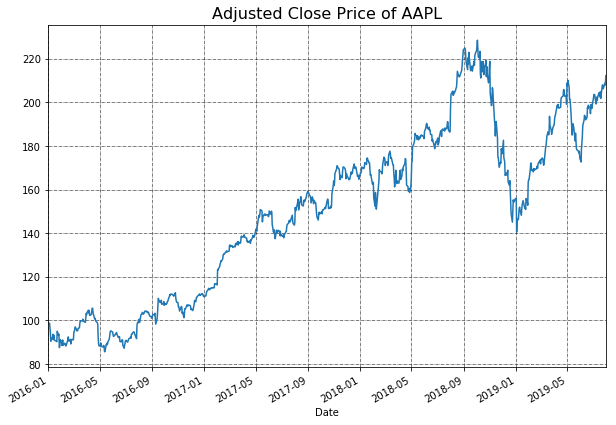

In [50]:
plt.figure(figsize=(10, 7))
data['Adj Close'].plot()
plt.title("Adjusted Close Price of %s" % 'AAPL', fontsize=16)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [129]:
data_msft_1m = yf.download(tickers="MSFT",
 period="5d",
 interval="1m")
data.head()

[*********************100%***********************]  1 of 1 completed


1. open   2. high  3. low  4. close  5. volume
date                                                                
2019-11-07 14:21:00  144.8050  144.8100  144.76   144.775    17821.0
2019-11-07 14:22:00  144.7750  144.7882  144.76   144.780    13429.0
2019-11-07 14:23:00  144.7867  144.8100  144.78   144.810    18097.0
2019-11-07 14:24:00  144.8150  144.8300  144.79   144.815    22326.0
2019-11-07 14:25:00  144.8150  144.8200  144.80   144.810    14321.0

### Stock Fundamental Data

In [130]:
# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

In [133]:
# get price to book
pb = msft.info['priceToBook']
#pe = msft.info['regularMarketPrice']/msft.info['epsTrailingTwelveMonths']
print('Price to Book Ratio is: %.2f' % pb)
#print('Price to Earnings Ratio is: %.2f' % pe)

Price to Book Ratio is: 10.38


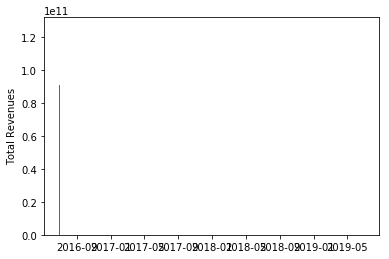

In [170]:
# show revenues
#plt.figure(figsize=(10, 7))
revenue = msft.financials.loc['Total Revenue']
plt.bar(revenue.index, revenue.values)
plt.ylabel("Total Revenues")
plt.show()

In [160]:
EBIT.values

array([42959000000.0, 35058000000.0, 29331000000.0, 27188000000.0],
      dtype=object)

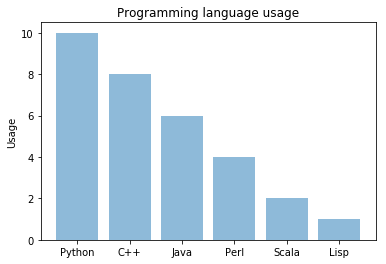

In [155]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

### Visualization and Analysis -> pyfolio tear sheet
pip install pyfolio

In [171]:
import pyfolio as pf

/Users/luckywang/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [172]:
# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT', 'WMT']
# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns=tickers_list)
# Feth the data

for ticker in tickers_list:
 data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
# Compute the returns of individula stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data = data.pct_change().dropna().mean(axis=1)
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2014-11-11    0.006197
2014-11-12    0.003272
2014-11-13    0.023576
2014-11-14    0.011881
2014-11-17   -0.002821
dtype: float64

/Users/luckywang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


/Users/luckywang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


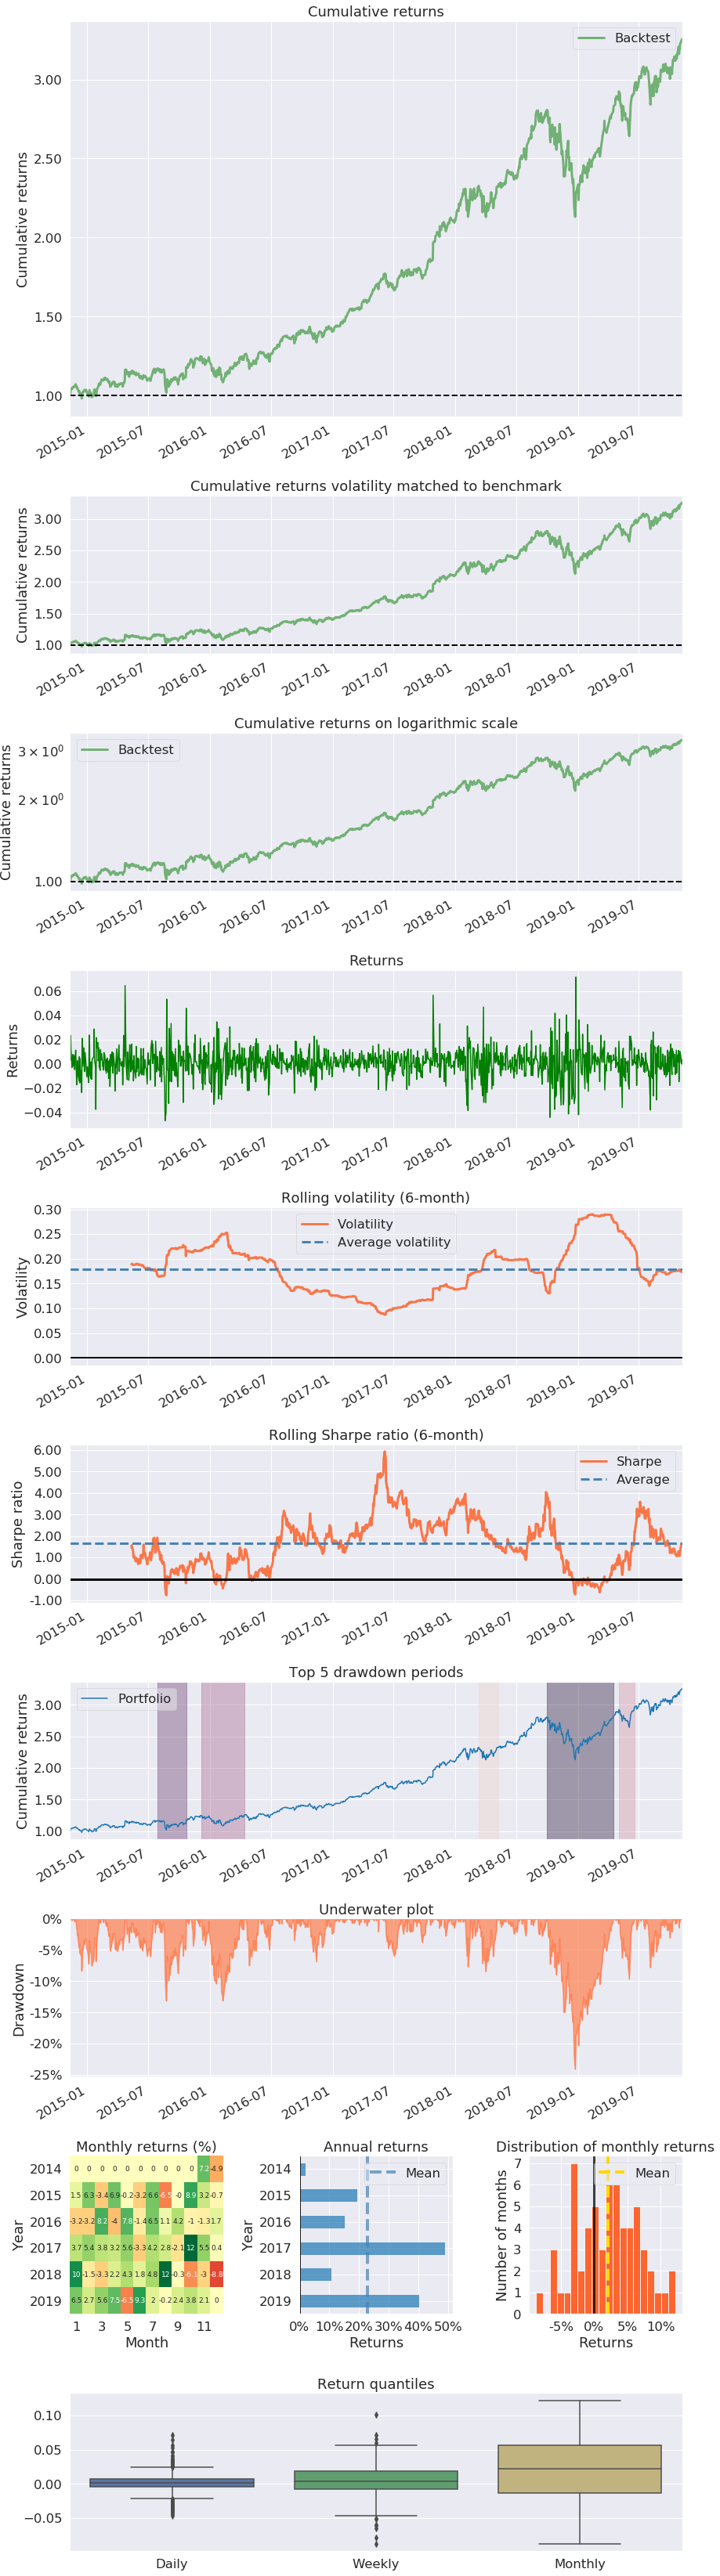

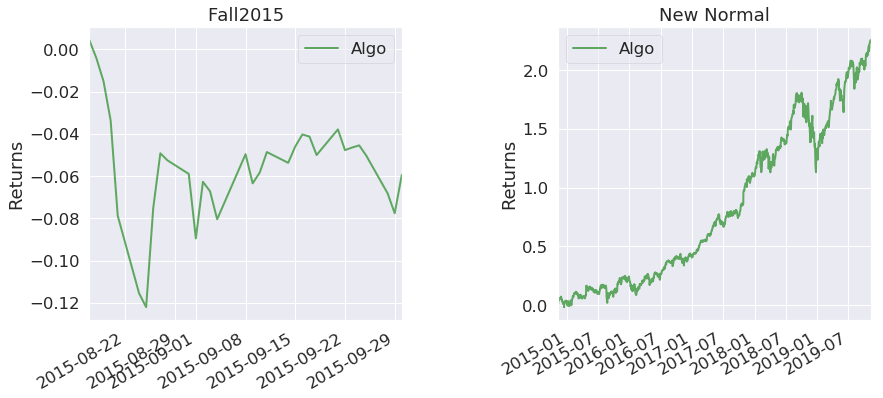

In [173]:
pf.create_full_tear_sheet(data)

### 2. Quandl

Run "pip install quandl" to install quandl package. Work fine on my MBP
#### Caution: Only available till 27-March-2018 so better for backtesting purpose

In [41]:
import quandl

In [42]:
QUANDL_API_KEY = 'ArmRjjU7vbzLWmx436f6'

In [61]:
start_date = '1990-01-01'
end_date = '2019-03-01'
# Set the ticker name
ticker = 'AMZN'
# Feth the data
data = quandl.get('WIKI/'+ticker, start_date=start_date,
 end_date=end_date, api_key=QUANDL_API_KEY)
# Print the first 5 rows of the dataframe
data.tail()

Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.448333  1.312500    1.395833   11776800.0

In [44]:
data = quandl.get("WIKI/KO", start_date="2016-01-01", end_date="2018-01-01", api_key=QUANDL_API_KEY)

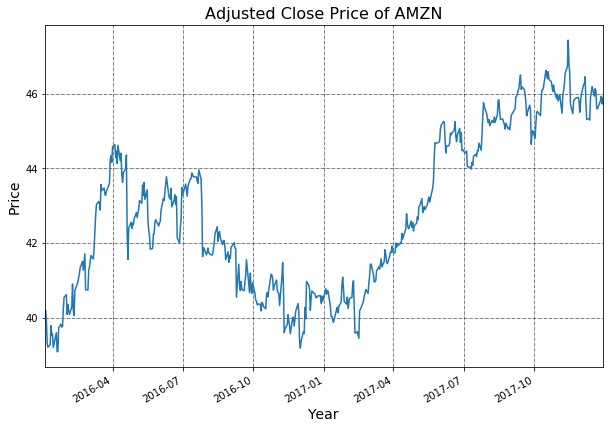

In [45]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))
# Plot the adjusted close price
data['Adj. Close'].plot()
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [126]:
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']
# Import pandas
data = pd.DataFrame(columns=tickers_list)
# Feth the data
for ticker in tickers_list:
 data[ticker] = quandl.get('WIKI/' + ticker, start_date=start_date,
 end_date=end_date, api_key=QUANDL_API_KEY)['Adj. Close']
# Print first 5 rows of the data
data.head()

AAPL        IBM      MSFT       WMT
Date                                               
1990-01-02  1.118093  14.138144  0.410278  4.054211
1990-01-03  1.125597  14.263656  0.412590  4.054211
1990-01-04  1.129499  14.426678  0.424702  4.033561
1990-01-05  1.133101  14.390611  0.414300  3.990541
1990-01-08  1.140605  14.480057  0.420680  4.043886

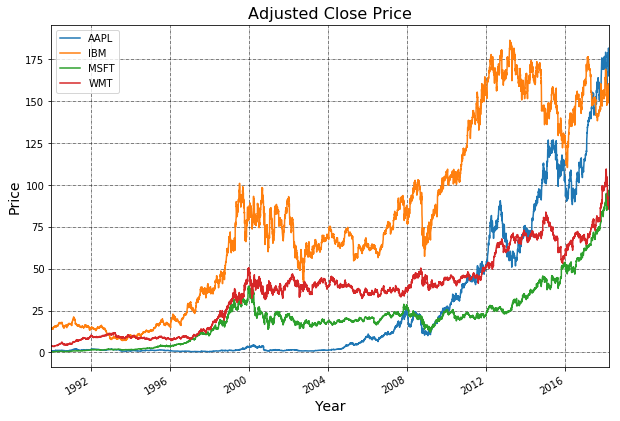

In [127]:
# Plot all the close prices
data.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### 3. Alpha vantage
Run "pip install alpha_vantage" 
Pros: Can get minute-level data

In [128]:
from alpha_vantage.timeseries import TimeSeries

Alpha_Vantage_Key =  "E1E5G1KRNKZV9UEX"
# initialize TS object with API key and output format
ts = TimeSeries(key=Alpha_Vantage_Key, output_format='pandas')
# Get the data
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
# Print the data
print(data.head())

                      1. open   2. high  3. low  4. close  5. volume
date                                                                
2019-11-07 14:21:00  144.8050  144.8100  144.76   144.775    17821.0
2019-11-07 14:22:00  144.7750  144.7882  144.76   144.780    13429.0
2019-11-07 14:23:00  144.7867  144.8100  144.78   144.810    18097.0
2019-11-07 14:24:00  144.8150  144.8300  144.79   144.815    22326.0
2019-11-07 14:25:00  144.8150  144.8200  144.80   144.810    14321.0


## B. Useful pandas function for stock data analysis

In [64]:
data.head().pct_change()

Open      High       Low     Close    Volume  Ex-Dividend  \
Date                                                                        
1997-05-16       NaN       NaN       NaN       NaN       NaN          NaN   
1997-05-19 -0.084004 -0.105263 -0.048780 -0.012048 -0.584571          NaN   
1997-05-20  0.012195 -0.011765  0.006667 -0.042439 -0.104736          NaN   
1997-05-21 -0.072289 -0.059524 -0.159450 -0.127356  2.448420          NaN   
1997-05-22 -0.103896 -0.120000 -0.045455 -0.022183 -0.375342          NaN   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
1997-05-16          NaN        NaN        NaN       NaN         NaN   
1997-05-19          0.0  -0.084004  -0.105263 -0.048780   -0.012048   
1997-05-20          0.0   0.012195  -0.011765  0.006667   -0.042439   
1997-05-21          0.0  -0.072289  -0.059524 -0.159450   -0.127356   
1997-05-22          0.0  -0.103896  -0.120000 -0.045455   -0.022183   

            Adj. Volume  
Date                     
1997-05-16          NaN  
1997-05-19    -0.584571  
1997-05-20    -0.104736  
1997-05-21     2.448420  
1997-05-22    -0.375342

In [66]:
pd.date_range('1/1/2000', periods=8)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(start='2018-04-24', end='2018-04-27', periods = 6)

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-24 14:24:00',
               '2018-04-25 04:48:00', '2018-04-25 19:12:00',
               '2018-04-26 09:36:00', '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [69]:
pd.date_range(start='1/1/2018', periods=5, freq='3M')

DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

In [75]:
ind = pd.date_range(start='1/1/2018', periods=5, tz='Asia/Taipei')
s1 = pd.Series(list(map(lambda x: x*2,range(5))), index=ind)
s1

2018-01-01 00:00:00+08:00    0
2018-01-02 00:00:00+08:00    2
2018-01-03 00:00:00+08:00    4
2018-01-04 00:00:00+08:00    6
2018-01-05 00:00:00+08:00    8
Freq: D, dtype: int64

## C. Get data at a custom frequency (with resample())

In [96]:
# During strategy modelling, you are required to work with a custom frequency of stock market data 
# such as 7 minutes or 35 minutes. This custom frequency candles are not provided by data vendors or web sources.
# In this case, you can use the pandas resample method to convert the stock market data to the frequency of your 
# choice. The implementation of these is shown below where a 1-minute frequency data is converted to 10-minute frequency data.

# The first step is to define the dictionary with the conversion logic. For example, to get the open value the first 
# value will be used, to get the high value the maximum value will be used and so on.

# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')
ohlcv_dict = {'1. Open': 'first','2. High': 'max','3. Low': 'min','4. Close': 'last','5. Volume': 'sum'}

[*********************100%***********************]  1 of 1 completed


In [97]:
data.index
data.index = pd.to_datetime(data.index)
data_10 = data.resample('10T').agg(ohlcv_dict)
data_10.head()

/Users/luckywang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


1. Open                                             \
                           Open        High     Low       Close  Adj Close   
Date                                                                         
2015-12-31 00:00:00  107.010002  107.029999  104.82  105.260002  98.657883   
2015-12-31 00:10:00         NaN         NaN     NaN         NaN        NaN   
2015-12-31 00:20:00         NaN         NaN     NaN         NaN        NaN   
2015-12-31 00:30:00         NaN         NaN     NaN         NaN        NaN   
2015-12-31 00:40:00         NaN         NaN     NaN         NaN        NaN   

                                    2. High                                  \
                         Volume        Open        High     Low       Close   
Date                                                                          
2015-12-31 00:00:00  40912300.0  107.010002  107.029999  104.82  105.260002   
2015-12-31 00:10:00         NaN         NaN         NaN     NaN         NaN   
2015-12-31 00:20:00         NaN         NaN         NaN     NaN         NaN   
2015-12-31 00:30:00         NaN         NaN         NaN     NaN         NaN   
2015-12-31 00:40:00         NaN         NaN         NaN     NaN         NaN   

                     ... 4. Close                                     \
                     ...      Low       Close  Adj Close      Volume   
Date                 ...                                               
2015-12-31 00:00:00  ...   104.82  105.260002  98.657883  40912300.0   
2015-12-31 00:10:00  ...      NaN         NaN        NaN         NaN   
2015-12-31 00:20:00  ...      NaN         NaN        NaN         NaN   
2015-12-31 00:30:00  ...      NaN         NaN        NaN         NaN   
2015-12-31 00:40:00  ...      NaN         NaN        NaN         NaN   

                      5. Volume                                             \
                           Open        High     Low       Close  Adj Close   
Date                                                                         
2015-12-31 00:00:00  107.010002  107.029999  104.82  105.260002  98.657883   
2015-12-31 00:10:00    0.000000    0.000000    0.00    0.000000   0.000000   
2015-12-31 00:20:00    0.000000    0.000000    0.00    0.000000   0.000000   
2015-12-31 00:30:00    0.000000    0.000000    0.00    0.000000   0.000000   
2015-12-31 00:40:00    0.000000    0.000000    0.00    0.000000   0.000000   

                               
                       Volume  
Date                           
2015-12-31 00:00:00  40912300  
2015-12-31 00:10:00         0  
2015-12-31 00:20:00         0  
2015-12-31 00:30:00         0  
2015-12-31 00:40:00         0  

[5 rows x 30 columns]

In [95]:
data.head()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2015-12-31  107.010002  107.029999  104.820000  105.260002  98.657883   
2016-01-04  102.610001  105.370003  102.000000  105.349998  98.742249   
2016-01-05  105.750000  105.849998  102.410004  102.709999  96.267815   
2016-01-06  100.559998  102.370003   99.870003  100.699997  94.383888   
2016-01-07   98.680000  100.129997   96.430000   96.449997  90.400467   

              Volume  
Date                  
2015-12-31  40912300  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400

### Downsampling (timeframe變小)

In [85]:
print(s1.resample('2D').sum())
print(s1.resample('3D').sum())

2018-01-01 00:00:00+08:00     2
2018-01-03 00:00:00+08:00    10
2018-01-05 00:00:00+08:00     8
Freq: 2D, dtype: int64
2018-01-01 00:00:00+08:00     6
2018-01-04 00:00:00+08:00    14
Freq: 3D, dtype: int64


### Upsampling

In [86]:
s1.resample('0.5D').ffill()

2018-01-01 00:00:00+08:00    0
2018-01-01 12:00:00+08:00    0
2018-01-02 00:00:00+08:00    2
2018-01-02 12:00:00+08:00    2
2018-01-03 00:00:00+08:00    4
2018-01-03 12:00:00+08:00    4
2018-01-04 00:00:00+08:00    6
2018-01-04 12:00:00+08:00    6
2018-01-05 00:00:00+08:00    8
Freq: 12H, dtype: int64

#### Upsample with NaNs Using asfreq()

In [88]:
s1.resample('.5min').asfreq().head()

2018-01-01 00:00:00+08:00    0.0
2018-01-01 00:00:30+08:00    NaN
2018-01-01 00:01:00+08:00    NaN
2018-01-01 00:01:30+08:00    NaN
2018-01-01 00:02:00+08:00    NaN
Freq: 30S, dtype: float64

## Yahoo finance Data Crawler

In [ ]:
import requests

url='http://chartapi.finance.yahoo.com/instrument/1.0/GOOG/chartdata;type=quote;range=1d/csv'
response = requests.get(url)
response_body = response.content
data = response_body.split('\n')
# Timestamp, close, high, low, open, volume in data[11]
summary = data[12:17]
interval_data = data[17:]

In [101]:
df = pd.read_csv("SHARADAR_TICKERS_fc1f55188fbc034eadec5932a08d626f.csv", index_col = "ticker")

In [121]:
data.index

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', name='Date', length=901, freq=None)